<a href="https://colab.research.google.com/github/AcerPing/NTUT_NeuralNetworkClass/blob/main/%E5%9C%8B%E7%AB%8B%E8%87%BA%E5%8C%97%E7%A7%91%E6%8A%80%E5%A4%A7%E5%AD%B8_%E9%A1%9E%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF_Practice(20230504).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Patterns
inputs = list()
inputs.append(np.array([1, 0.1, 0.1]))
inputs.append(np.array([1, 0.1, 0.95]))
inputs.append(np.array([1, 0.95, 0.1]))
inputs.append(np.array([1, 0.95, 0.95]))
inputs

[array([1. , 0.1, 0.1]),
 array([1.  , 0.1 , 0.95]),
 array([1.  , 0.95, 0.1 ]),
 array([1.  , 0.95, 0.95])]

In [ ]:
# 隱藏層權重
Weight_InputToHiddenLayer = [[5.32, 3.13],
                [-3.73, -6.67],
                [-3.72, -6.61]]

In [ ]:
# 內積
S_HiddenLayer = list()
for _input in inputs: 
  S_HiddenLayer.append(np.matmul(_input, Weight_InputToHiddenLayer))
S_HiddenLayer

[array([4.575, 1.802]),
 array([ 1.413 , -3.8165]),
 array([ 1.4045, -3.8675]),
 array([-1.7575, -9.486 ])]

In [ ]:
print(1*5.32+0.1*(-3.73)+0.1*(-3.72))

4.575


In [ ]:
print(1*3.13+0.1*(-6.67)+0.1*(-6.61))

1.802


In [ ]:
# 為了利用Pandas Apply函數，特別轉換成Pandas
df_S_HiddenLayer = pd.DataFrame(S_HiddenLayer, columns=['X1', 'X2'])
df_S_HiddenLayer

,X1,X2
0,4.5750,1.8020
1,1.4130,-3.8165
2,1.4045,-3.8675
3,-1.7575,-9.4860


In [ ]:
def sigmoid(v):
    return 1 / (1 + np.exp(-v))

In [ ]:
df_S_HiddenLayer = df_S_HiddenLayer.apply(sigmoid)
df_S_HiddenLayer

,X1,X2
0,0.989799,0.858392
1,0.804239,0.021531
2,0.802897,0.020482
3,0.147104,0.000076


In [ ]:
v = 4.5750	
1 / (1 + np.exp(-v))

0.9897988370592303

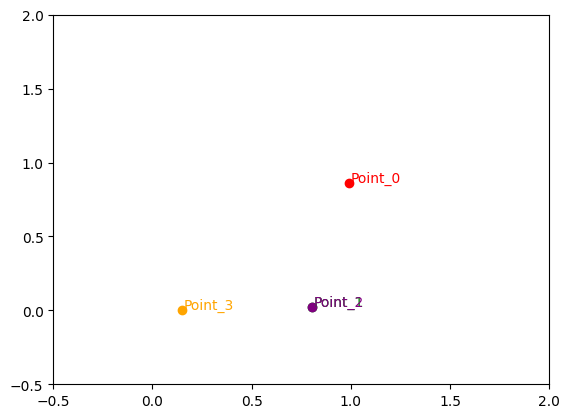

In [ ]:
numpy_S_HiddenLayer = np.array(df_S_HiddenLayer)
numpy_S_HiddenLayer

# 選擇四種不同的顏色
colors =  ['red', 'green', 'purple', 'orange']

# 在每個點上標出數字
for i in range(len(numpy_S_HiddenLayer)):
    plt.plot(numpy_S_HiddenLayer[i][0], numpy_S_HiddenLayer[i][1], 'o', color=colors[i])
    plt.text(numpy_S_HiddenLayer[i][0]+0.01, numpy_S_HiddenLayer[i][1]+0.01, str(f'Point_{i}'), color=colors[i])

# 設定x軸和y軸的範圍
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)

# 顯示圖形
plt.show()

# 因為Point1及Point2數值很接近，所以會被蓋住。

In [ ]:
# 插入X0 = 1
df_S_HiddenLayer.insert(0, 'X0', [1, 1, 1, 1])
df_S_HiddenLayer

,X0,X1,X2
0,1,0.989799,0.858392
1,1,0.804239,0.021531
2,1,0.802897,0.020482
3,1,0.147104,0.000076


In [ ]:
# 轉成numpy
numpy_S_HiddenLayer = np.array(df_S_HiddenLayer)
numpy_S_HiddenLayer

array([[1.00000000e+00, 9.89798837e-01, 8.58392219e-01],
       [1.00000000e+00, 8.04238691e-01, 2.15309020e-02],
       [1.00000000e+00, 8.02897000e-01, 2.04822841e-02],
       [1.00000000e+00, 1.47103724e-01, 7.59013639e-05]])

In [ ]:
# 輸出層權重
Weight_HiddenLayerToOutput = [[-3.08],
                [7.30],
                [-7.30]]
Weight_HiddenLayerToOutput

[[-3.08], [7.3], [-7.3]]

In [ ]:
# 內積
S_Predict = list()
for _input in numpy_S_HiddenLayer:
  S_Predict.append(sigmoid(np.matmul(_input, Weight_HiddenLayerToOutput)))
S_Predict

[array([0.10709808]),
 array([0.93300339]),
 array([0.93286954]),
 array([0.11850158])]

[0.10709808]
red
[0.93300339]
green
[0.93286954]
purple
[0.11850158]
orange


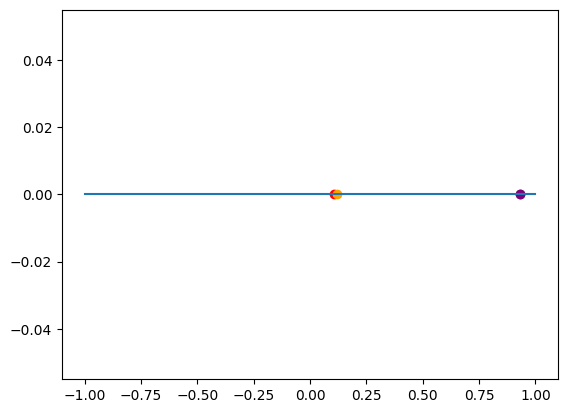

In [ ]:
import matplotlib.pyplot as plt

# 繪製直線
x = [-1, 1]
y = [0, 0]
plt.plot(x, y)

# 繪製四個點
colors = ['red', 'green', 'purple', 'orange']
i = 0
for (point, color) in zip(S_Predict,colors) :
    plt.scatter(point, 0, color=color)
    i += 1

# 顯示圖形
plt.show()

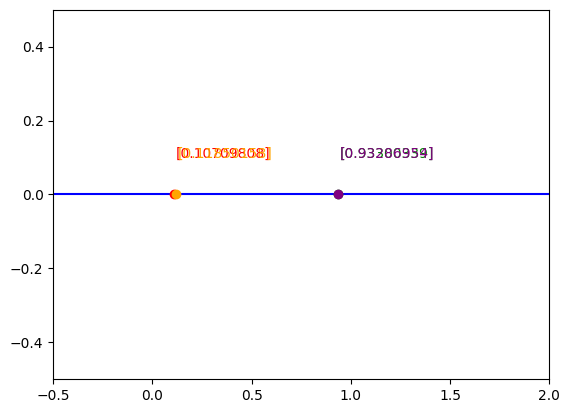

In [ ]:
# 選擇四種不同的顏色
colors =  ['red', 'green', 'purple', 'orange']
# 繪製直線
plt.axhline(y=0, color='blue')

# 在每個點上標出數字
for i in range(len(S_Predict)):
    plt.plot(S_Predict[i], 0, 'o', color=colors[i])
    plt.text(S_Predict[i]+0.01, 0.1, str(S_Predict[i]), color=colors[i])

# 設定x軸和y軸的範圍
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 0.5)

# 顯示圖形
plt.show()